<h1> Analyse non supervisée

In [591]:
import sys 
sys.path.insert(1, "../utils")
from dbscan import DBSCAN
from k_means import K_means
from utils import silhouette_score_scratch

In [592]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import seaborn as sns
sns.set(style="white")

In [593]:
# import data
from utils import load_data
data = load_data('../Data/Dataset1_cleaned.csv')
data

N         P         K        pH         S        Zn        Fe   
0    0.281525  0.417582  0.593935  0.473214  0.370814  0.248175  0.007990  \
1    0.501466  0.336996  0.265533  0.616071  1.000000  0.335766  0.051938   
2    0.354839  0.490842  0.827663  0.589286  0.962989  0.335766  0.051938   
3    0.337243  0.285714  0.468195  0.633929  1.000000  0.394161  0.026368   
4    0.668622  0.512821  0.422337  0.625000  0.786747  0.262774  0.043947   
..        ...       ...       ...       ...       ...       ...       ...   
876  0.906158  0.571429  0.687130  0.919643  0.465280  0.423358  0.357970   
877  0.651026  0.446886  0.484467  0.276786  0.231230  0.408759  0.643228   
878  0.686217  0.461538  0.312870  0.616071  0.422982  0.510949  0.268478   
879  0.815249  0.798535  0.343935  0.401786  0.337681  0.744526  0.349181   
880  0.651026  0.542125  0.468195  0.500000  0.699330  0.554745  0.571314   

           Cu        Mn         B        OM  Fertility  
0    0.325359  0.446753  0.047170  0.468750          0  
1    0.693780  0.144416  1.000000  0.750000          0  
2    0.708134  0.134545  1.000000  0.789063          0  
3    0.688995  0.131948  1.000000  0.656250          0  
4    0.765550  0.120519  1.000000  0.593750          1  
..        ...       ...       ...       ...        ...  
876  0.287081  0.567273  0.594340  0.148438          1  
877  0.172249  0.408831  0.320755  0.000000          1  
878  0.258373  0.330909  0.245283  0.304688          1  
879  0.444976  0.682597  0.443396  0.757813          2  
880  0.851675  0.546494  0.537736  0.609375          0  

[881 rows x 12 columns]

<h2> Réduction de dimensionnalité PCA

In [594]:
# Appliquer pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = ['N', 'P', 'K', 'pH','S', 'Zn', 'Fe', 'Cu', 'Mn', 'B','OM']
X = data[features]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

df_final = pd.concat([df_pca, data['Fertility']], axis=1)

df_final

Principal Component 1  Principal Component 2  Fertility
0                 0.203845               0.945809          0
1                 3.774824              -0.672363          0
2                 3.956408              -1.056054          0
3                 4.035527              -0.912432          0
4                 3.029273              -0.080972          1
..                     ...                    ...        ...
876              -0.544179               1.161138          1
877              -1.653768               0.601650          1
878              -0.267843               0.805540          1
879              -0.943584              -1.252460          2
880               0.070135              -2.402725          0

[881 rows x 3 columns]

visualisation du dataset avec la réduction de dimensionnalité PCA

C:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Temp\ipykernel_17732\847789089.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolors='k', alpha=0.7)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


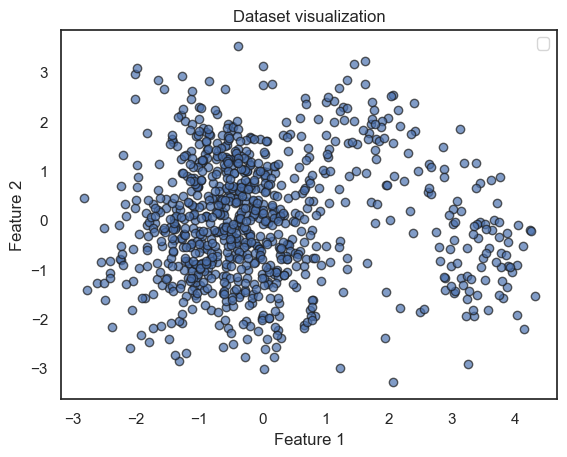

In [595]:
X = df_final.iloc[:, :-1].values
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', edgecolors='k', alpha=0.7)

plt.title('Dataset visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

<h2>A. Application d’algorithme de clustering basé partitionnement

<h2> K-means

<h3>Expérimentation en variant les paramètres de k-means sur les instances du dataset avec PCA

In [596]:
import time

# Initialize an empty list to store the results
result_data = []

# Plot the silhouette score for different k values
silhouette_scores = []

for i in range(2, 11):
    start_time = time.time()  # Record the start time
    model = K_means(k=i, data=X, distance='euclidean')
    clusters, centroids = model.fit(100)
    end_time = time.time()  # Record the end time

    silhouette_avg = silhouette_score_scratch(X, clusters)
    silhouette_scores.append(silhouette_avg)

    # Count the number of points in each cluster
    number_of_points_in_cluster = []
    unique_labels = np.unique(clusters)

    for j in unique_labels:
        number_of_points_in_cluster.append((i, np.sum(clusters == j)))

    # Append the results to the list
    result_data.append({
        'k': i,
        'Silhouette Score': silhouette_avg,
        'Len cluster': number_of_points_in_cluster,  # Count unique cluster assignments
        'Execution Time (s)': end_time - start_time  # Calculate the execution time
    })

    print(f"Silhouette Score for k={i}: {silhouette_avg}")
    print(f"Number of cluster: {len(set(clusters))}")
    print(f"Number of unique points in each cluster: {number_of_points_in_cluster}")
    print(f"Execution Time for k={i}: {end_time - start_time} seconds")

# Create a DataFrame from the list of results
result_df_kmeans  = pd.DataFrame(result_data)



Silhouette Score for k=2: 0.4934965710236516
Number of cluster: 2
Number of unique points in each cluster: [(2, 165), (2, 716)]
Execution Time for k=2: 0.29082512855529785 seconds
Silhouette Score for k=3: 0.4033318513693721
Number of cluster: 3
Number of unique points in each cluster: [(3, 424), (3, 344), (3, 113)]
Execution Time for k=3: 0.37645983695983887 seconds
Silhouette Score for k=4: 0.39221233229046504
Number of cluster: 4
Number of unique points in each cluster: [(4, 360), (4, 91), (4, 99), (4, 331)]
Execution Time for k=4: 0.5117764472961426 seconds
Silhouette Score for k=5: 0.3817333036177193
Number of cluster: 5
Number of unique points in each cluster: [(5, 274), (5, 200), (5, 90), (5, 94), (5, 223)]
Execution Time for k=5: 1.1080372333526611 seconds
Silhouette Score for k=6: 0.37148985663194606
Number of cluster: 6
Number of unique points in each cluster: [(6, 186), (6, 85), (6, 142), (6, 84), (6, 161), (6, 223)]
Execution Time for k=6: 1.2924833297729492 seconds
Silhoue

In [597]:
result_df_kmeans 

k  Silhouette Score                                        Len cluster   
0   2          0.493497                               [(2, 165), (2, 716)]  \
1   3          0.403332                     [(3, 424), (3, 344), (3, 113)]   
2   4          0.392212             [(4, 360), (4, 91), (4, 99), (4, 331)]   
3   5          0.381733   [(5, 274), (5, 200), (5, 90), (5, 94), (5, 223)]   
4   6          0.371490  [(6, 186), (6, 85), (6, 142), (6, 84), (6, 161...   
5   7          0.363364  [(7, 157), (7, 115), (7, 200), (7, 125), (7, 8...   
6   8          0.348210  [(8, 135), (8, 119), (8, 78), (8, 129), (8, 85...   
7   9          0.335815  [(9, 125), (9, 48), (9, 46), (9, 51), (9, 146)...   
8  10          0.355824  [(10, 90), (10, 82), (10, 49), (10, 144), (10,...   

   Execution Time (s)  
0            0.290825  
1            0.376460  
2            0.511776  
3            1.108037  
4            1.292483  
5            1.398014  
6            1.624875  
7            0.930120  
8            1.587027

<h2> Evaluation 

<h3>Silhouette Analysis

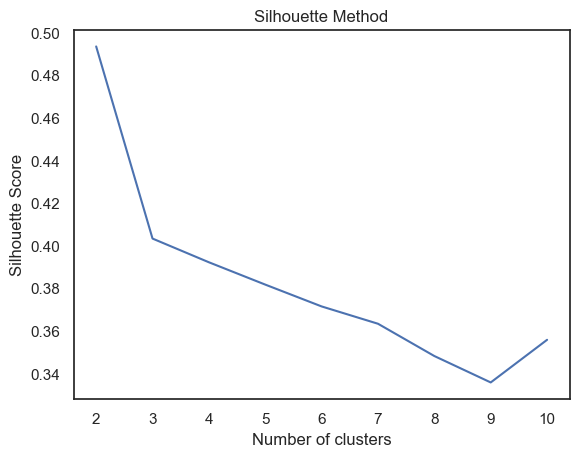

In [598]:
# Plot the Silhouette Method
plt.plot(result_df_kmeans['k'], result_df_kmeans['Silhouette Score'])
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


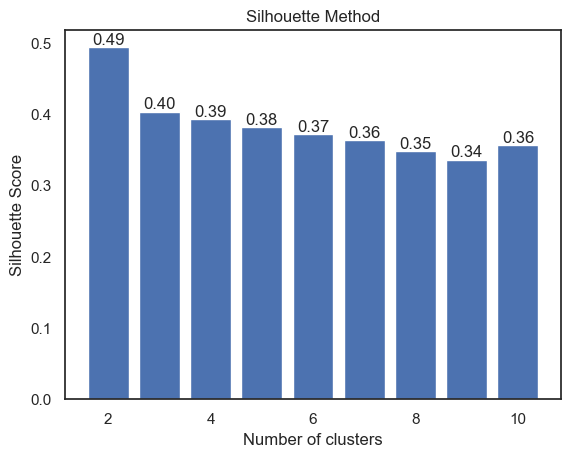

In [599]:
# bar chart of the silhouette scores for different k values
plt.bar(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

for i in range(2, 11):
    plt.text(i, silhouette_scores[i-2], f"{silhouette_scores[i-2]:.2f}", ha='center', va='bottom')
    
plt.show()

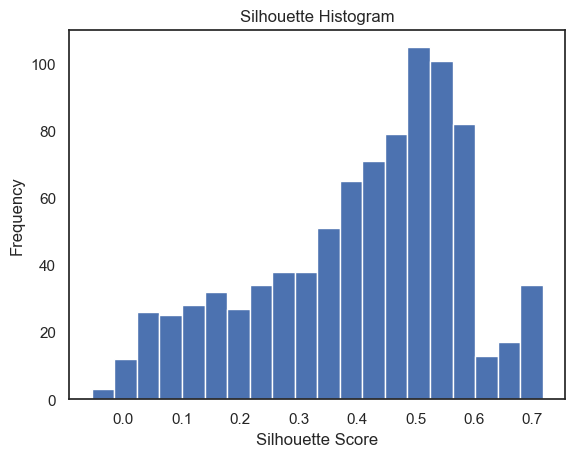

In [600]:
# cluster diagnostics
from utils import silhouette_sample_scratch
from matplotlib.ticker import FixedLocator, FixedFormatter

model = K_means(k=3, data=X, distance='euclidean')
clusters, centroids = model.fit(100)

silhouette_values = silhouette_sample_scratch(X, clusters)

plt.hist(silhouette_values, bins=20)
plt.title('Silhouette Histogram')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()

<h3> la métrique adjusted_rand_score

L'ARS varie de -1 à 1. Une valeur de 1 indique une parfaite concordance entre les deux partitions, 0 indique une concordance aléatoire, et -1 indique une discordance totale.

In [601]:
y_true = data['Fertility']
# import la metrique adjust rand score
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(clusters, y_true)

0.009415337122583795

<h3>Elbow method

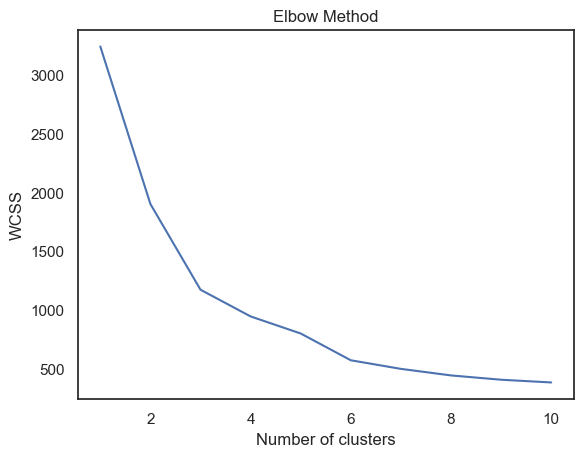

In [602]:
# elbow method
wcss = []

# Assuming X is your data
for i in range(1, 11):
    model = K_means(k=i, data=X, distance='euclidean')  # Fix the k value here
    clusters, centroids = model.fit(100)
    wcss_value = np.sum((X - centroids[clusters]) ** 2)  # Calculate WCSS
    wcss.append(wcss_value)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

On va tester avec les deux k=2 et k=3

In [603]:
X = df_final.iloc[:, :-1].values
model = K_means(k=2, data=X, distance='euclidean')
clusters, centroids = model.fit(100)
print(centroids)
print(clusters)

[[-0.59588383 -0.07320894]
 [ 2.51046914  0.30843056]]
[0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

<h3> Cluster centroids plot

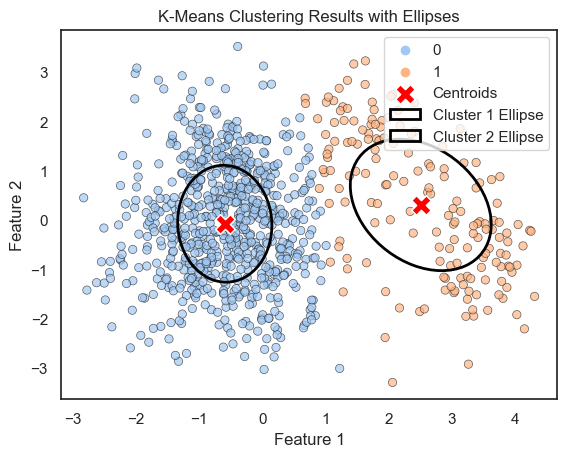

In [604]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Votre code précédent...

# Utiliser la palette "pastel" de Seaborn
sns.set_palette("pastel")

# Tracer les points du cluster avec Seaborn
scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='pastel', edgecolor='k', alpha=0.7)

# Tracer les centroids en rouge
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids', ax=scatter)

# Tracer les ellipses
for i in range(len(np.unique(clusters))):
    cluster_points = X[clusters == i]
    covariance_matrix = np.cov(cluster_points.T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

    width = 2 * np.sqrt(eigenvalues[0])
    height = 2 * np.sqrt(eigenvalues[1])

    std_dev_x = np.sqrt(covariance_matrix[0, 0])
    std_dev_y = np.sqrt(covariance_matrix[1, 1])

    ellipse = Ellipse(xy=centroids[i], width=2 * std_dev_x, height=2 * std_dev_y, angle=angle, edgecolor='black', lw=2, fill=False, label=f'Cluster {i+1} Ellipse')
    plt.gca().add_patch(ellipse)

# Réglages du graphique
plt.title('K-Means Clustering Results with Ellipses')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()


In [605]:

silhouette_avg = silhouette_score_scratch(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.49067068089398225


In [606]:
model = K_means(k=3, data=X, distance='euclidean')
clusters, centroids = model.fit(100)
print(centroids)
print(clusters)


[[-0.67234096 -0.85710803]
 [-0.17418323  1.18352548]
 [ 3.05302302 -0.38689347]]
[1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 2 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 2 0 2 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1
 1 1 1 1 2 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 1

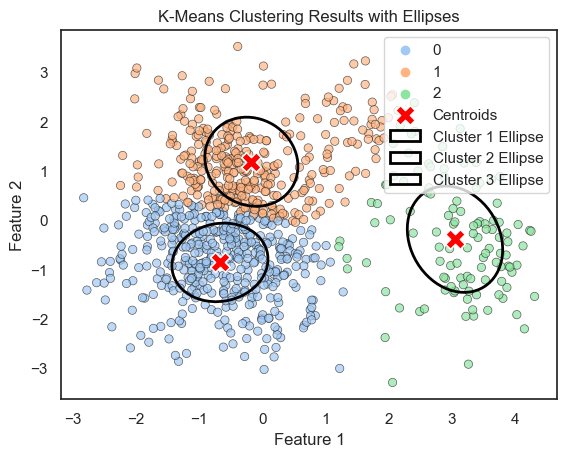

In [607]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Your code

# Use the "pastel" palette from Seaborn
sns.set_palette("pastel")

# Scatter plot for data points
scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='pastel', edgecolor='k', alpha=0.7)

# Scatter plot for centroids in red
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids', ax=scatter)

# Ellipse plotting
for i in range(len(np.unique(clusters))):
    cluster_points = X[clusters == i]
    covariance_matrix = np.cov(cluster_points.T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

    width = 2 * np.sqrt(eigenvalues[0])
    height = 2 * np.sqrt(eigenvalues[1])
    
    std_dev_x = np.sqrt(covariance_matrix[0, 0])
    std_dev_y = np.sqrt(covariance_matrix[1, 1])
    
    ellipse = Ellipse(xy=centroids[i], width=2 * std_dev_x, height=2 * std_dev_y, angle=angle, edgecolor='black', lw=2, fill=False, label=f'Cluster {i+1} Ellipse')
    plt.gca().add_patch(ellipse)

# Set plot title and axis labels
plt.title('K-Means Clustering Results with Ellipses')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Display the legend
plt.legend()

# Show the plot
plt.show()


Evaluation avec silhouette score

In [608]:

silhouette_avg = silhouette_score_scratch(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4033318513693721


<h3>Graphe des temps d'exécution en fonction des k

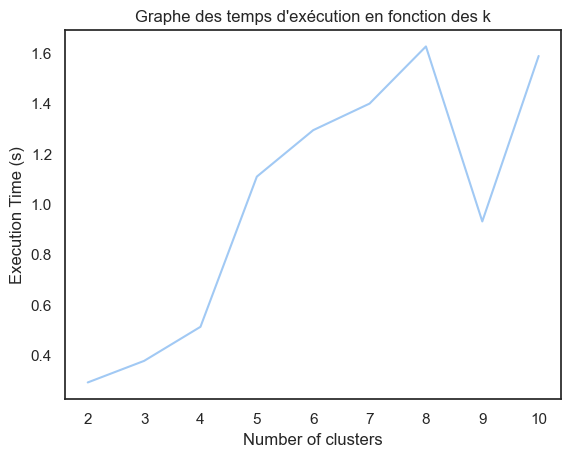

In [609]:
# graphe des temps d'exécution en fonction des k
plt.plot(result_df_kmeans['k'], result_df_kmeans['Execution Time (s)'])
plt.title('Graphe des temps d\'exécution en fonction des k')
plt.xlabel('Number of clusters')
plt.ylabel('Execution Time (s)')
plt.show()


<h3>Pair plots

avec k=3

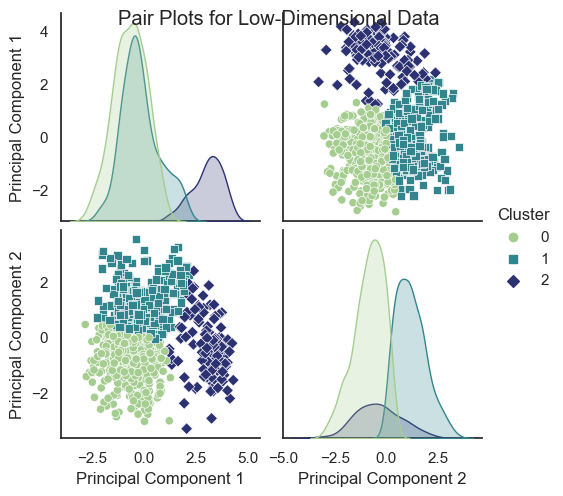

In [610]:
# Create pair plots
# drop the fertility column
df = df_final.copy()
df.drop('Fertility', axis=1, inplace=True)
df['Cluster']= clusters
sns.pairplot(df, hue='Cluster', palette='crest', markers=['o', 's', 'D'])
plt.suptitle('Pair Plots for Low-Dimensional Data')
plt.show()

In [611]:
df

Principal Component 1  Principal Component 2  Cluster
0                 0.203845               0.945809        1
1                 3.774824              -0.672363        2
2                 3.956408              -1.056054        2
3                 4.035527              -0.912432        2
4                 3.029273              -0.080972        2
..                     ...                    ...      ...
876              -0.544179               1.161138        1
877              -1.653768               0.601650        1
878              -0.267843               0.805540        1
879              -0.943584              -1.252460        0
880               0.070135              -2.402725        0

[881 rows x 3 columns]

<h3>Parallel Coordinates plot

pour detecter les motifs frequents

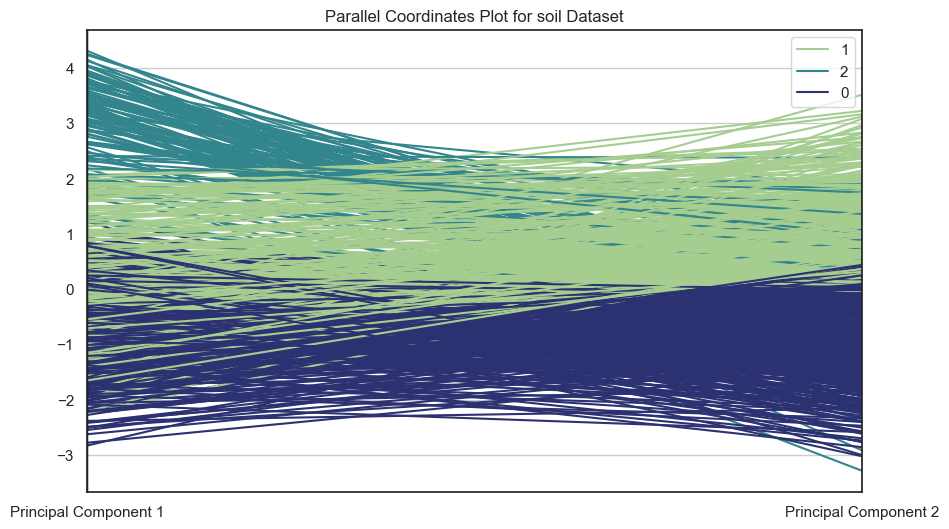

In [612]:
# Plotting Parallel Coordinates
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Cluster', colormap='crest')
plt.title('Parallel Coordinates Plot for soil Dataset')
plt.show()

<h2>Feature selection

In [613]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

df = data.copy()
# Séparation des caractéristiques (X) et de la cible (y)
X = df.drop('Fertility', axis=1)
y = df['Fertility']

# Appliquer SelectKBest avec la métrique f_classif 
k_best = SelectKBest(score_func=f_classif, k='all')
X_best = k_best.fit_transform(X, y)

# Obtenez les scores p-values pour chaque caractéristique
scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best.scores_,
                       'P-Value': k_best.pvalues_})

# Afficher les scores
print(scores)

   Feature       Score        P-Value
0        N  519.713926  1.203477e-149
1        P  108.735088   6.448332e-43
2        K    1.747207   1.748653e-01
3       pH    7.126101   8.511839e-04
4        S    2.728147   6.589422e-02
5       Zn    0.257049   7.733882e-01
6       Fe    1.093754   3.354126e-01
7       Cu    8.563963   2.072673e-04
8       Mn    1.290595   2.756285e-01
9        B    1.055365   3.485064e-01
10      OM    0.935052   3.929559e-01


In [614]:
scores

Feature       Score        P-Value
0        N  519.713926  1.203477e-149
1        P  108.735088   6.448332e-43
2        K    1.747207   1.748653e-01
3       pH    7.126101   8.511839e-04
4        S    2.728147   6.589422e-02
5       Zn    0.257049   7.733882e-01
6       Fe    1.093754   3.354126e-01
7       Cu    8.563963   2.072673e-04
8       Mn    1.290595   2.756285e-01
9        B    1.055365   3.485064e-01
10      OM    0.935052   3.929559e-01

In [615]:
# laisser que   N, P, pH, et Cu

df.drop([ 'K','S', 'Zn', 'Fe', 'Mn', 'B','OM'], axis=1, inplace=True)
df


N         P        pH        Cu  Fertility
0    0.281525  0.417582  0.473214  0.325359          0
1    0.501466  0.336996  0.616071  0.693780          0
2    0.354839  0.490842  0.589286  0.708134          0
3    0.337243  0.285714  0.633929  0.688995          0
4    0.668622  0.512821  0.625000  0.765550          1
..        ...       ...       ...       ...        ...
876  0.906158  0.571429  0.919643  0.287081          1
877  0.651026  0.446886  0.276786  0.172249          1
878  0.686217  0.461538  0.616071  0.258373          1
879  0.815249  0.798535  0.401786  0.444976          2
880  0.651026  0.542125  0.500000  0.851675          0

[881 rows x 5 columns]

In [616]:
X2 = df.iloc[:, :-1].values
model = K_means(k=3, data=X2, distance='euclidean')
clusters, centroids = model.fit(100)
print(centroids)
print(clusters)

[[0.72601717 0.36941502 0.58730753 0.27168152]
 [0.43719589 0.31628706 0.43754988 0.52753201]
 [0.69183385 0.84669651 0.52985639 0.4416597 ]]
[1 1 1 1 1 1 1 0 2 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0
 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 2 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 2 1 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 0 0 0 2 0 1 0
 0 0 2 1 0 0 1 2 0 1 0 0 0 0 2 1 0 1 0 2 2 2 0 2 0 0 0 2 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 2 0 2 2 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 

In [617]:
df1 = df.copy()
df1.drop('Fertility', axis=1, inplace=True)

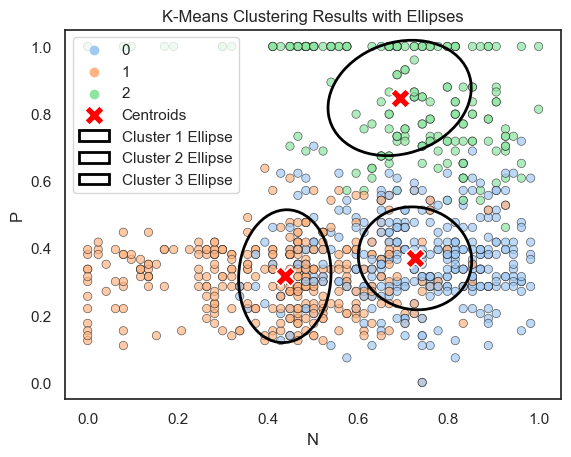

In [618]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Your code

# Use the "pastel" palette from Seaborn
sns.set_palette("pastel")

# Scatter plot for data points
scatter = sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=clusters, palette='pastel', edgecolor='k', alpha=0.7)

# Scatter plot for centroids in red
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids', ax=scatter)

# Ellipse plotting
for i in range(len(np.unique(clusters))):
    cluster_points = X[clusters == i]
    covariance_matrix = np.cov(cluster_points.T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

    width = 2 * np.sqrt(eigenvalues[0])
    height = 2 * np.sqrt(eigenvalues[1])
    
    std_dev_x = np.sqrt(covariance_matrix[0, 0])
    std_dev_y = np.sqrt(covariance_matrix[1, 1])
    
    ellipse = Ellipse(xy=centroids[i], width=2 * std_dev_x, height=2 * std_dev_y, angle=angle, edgecolor='black', lw=2, fill=False, label=f'Cluster {i+1} Ellipse')
    plt.gca().add_patch(ellipse)

# Set plot title and axis labels
plt.title('K-Means Clustering Results with Ellipses')
plt.xlabel(df1.columns[0])
plt.ylabel(df1.columns[1])

# Display the legend
plt.legend()

# Show the plot
plt.show()


Evaluation avec silhouette score

In [619]:

silhouette_avg = silhouette_score_scratch(X2, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.22500560143693116


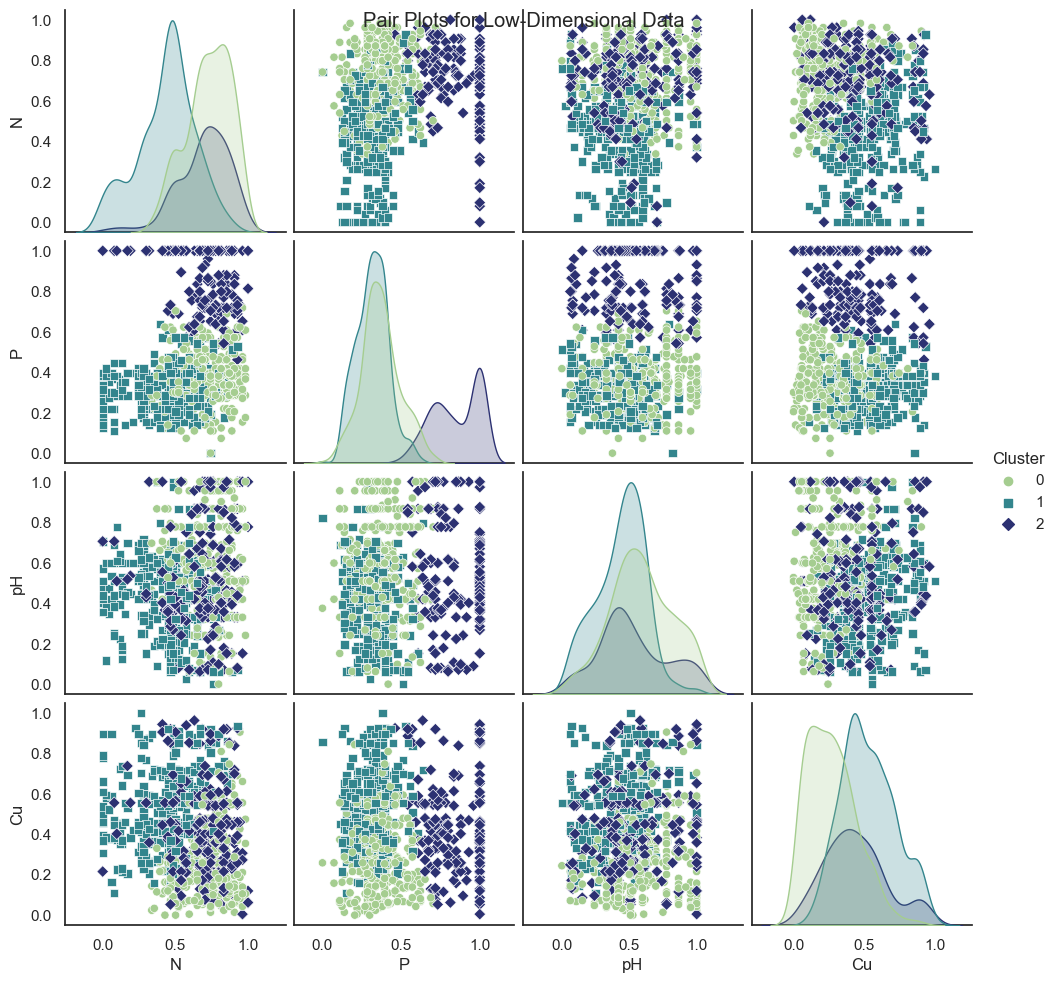

In [620]:
# Create pair plots
# drop the fertility column

df1['Cluster']= clusters
sns.pairplot(df1, hue='Cluster', palette='crest', markers=['o', 's', 'D'])
plt.suptitle('Pair Plots for Low-Dimensional Data')
plt.show()

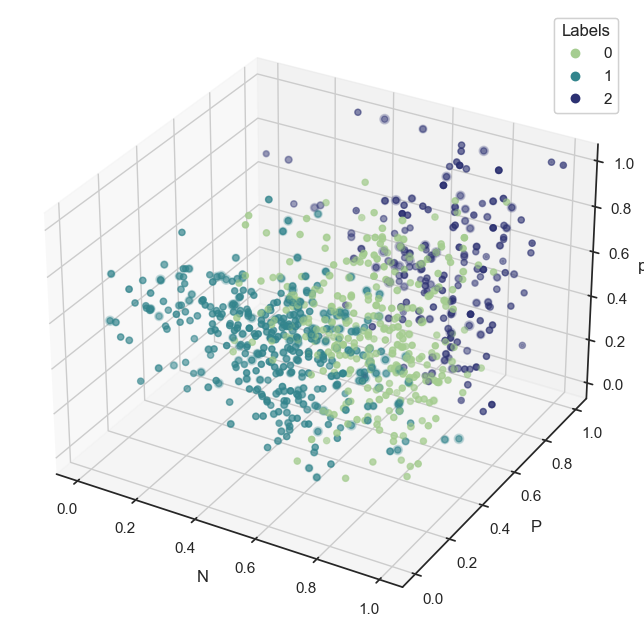

In [621]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Créer une figure en 3D avec une taille spécifiée
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser seaborn pour tracer le scatterplot en 3D avec la couleur basée sur la 4ème colonne
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], c=df1.iloc[:, 4], cmap='crest', marker='o')

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

# Ajouter une dimension supplémentaire pour la taille des marqueurs basée sur la 4ème colonne
size_factor = 50  # Ajustez cela en fonction de la taille souhaitée des marqueurs
scatter_sizes = df1.iloc[:, 3] * size_factor
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], s=scatter_sizes, c=df1.iloc[:, 4], cmap='crest', marker='o', alpha=0.2)

# Ajouter le nom des attributs à chaque axe
ax.set_xlabel(df1.columns[0])
ax.set_ylabel(df1.columns[1])
ax.set_zlabel(df1.columns[2])

# Afficher le plot
plt.show()


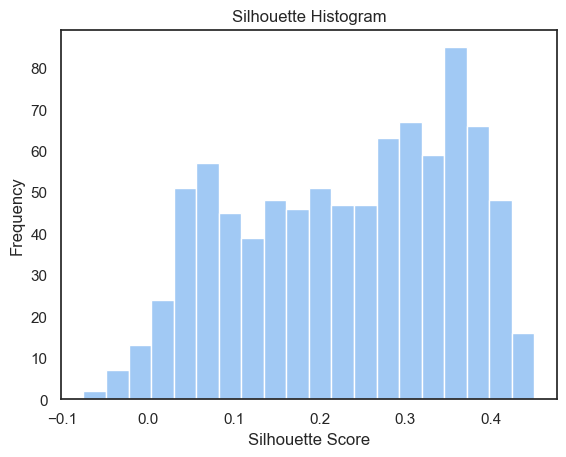

In [622]:
model = K_means(k=3, data=X2, distance='euclidean')
clusters, centroids = model.fit(100)

silhouette_values = silhouette_sample_scratch(X2, clusters)

plt.hist(silhouette_values, bins=20)
plt.title('Silhouette Histogram')
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.show()

Silhouette Score for k=2: 0.2345800778586695
Number of cluster: 2
Number of unique points in each cluster: [(2, 365), (2, 516)]
Execution Time for k=2: 0.5468814373016357 seconds
Silhouette Score for k=3: 0.2255876337021319
Number of cluster: 3
Number of unique points in each cluster: [(3, 342), (3, 184), (3, 355)]
Execution Time for k=3: 0.5160515308380127 seconds
Silhouette Score for k=4: 0.21823832761948964
Number of cluster: 4
Number of unique points in each cluster: [(4, 260), (4, 271), (4, 145), (4, 205)]
Execution Time for k=4: 0.6839883327484131 seconds
Silhouette Score for k=5: 0.2342167828598782
Number of cluster: 5
Number of unique points in each cluster: [(5, 135), (5, 177), (5, 204), (5, 230), (5, 135)]
Execution Time for k=5: 0.9492573738098145 seconds
Silhouette Score for k=6: 0.21192430222673783
Number of cluster: 6
Number of unique points in each cluster: [(6, 205), (6, 110), (6, 157), (6, 113), (6, 80), (6, 216)]
Execution Time for k=6: 0.5539999008178711 seconds
Silh

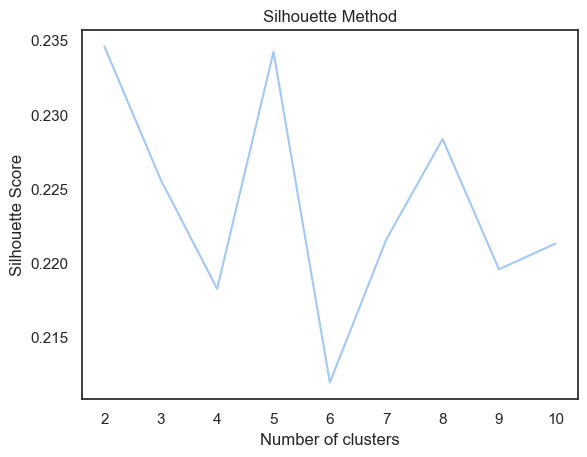

In [623]:
import time

# Initialize an empty list to store the results
result_data_2 = []

# Plot the silhouette score for different k values
silhouette_scores = []

for i in range(2, 11):
    start_time = time.time()  # Record the start time
    model = K_means(k=i, data=X2, distance='euclidean')
    clusters, centroids = model.fit(100)
    end_time = time.time()  # Record the end time

    silhouette_avg = silhouette_score_scratch(X2, clusters)
    silhouette_scores.append(silhouette_avg)

    # Count the number of points in each cluster
    number_of_points_in_cluster = []
    unique_labels = np.unique(clusters)

    for j in unique_labels:
        number_of_points_in_cluster.append((i, np.sum(clusters == j)))

    # Append the results to the list
    result_data_2.append({
        'k': i,
        'Silhouette Score': silhouette_avg,
        'Len cluster': number_of_points_in_cluster,  # Count unique cluster assignments
        'Execution Time (s)': end_time - start_time  # Calculate the execution time
    })

    print(f"Silhouette Score for k={i}: {silhouette_avg}")
    print(f"Number of cluster: {len(set(clusters))}")
    print(f"Number of unique points in each cluster: {number_of_points_in_cluster}")
    print(f"Execution Time for k={i}: {end_time - start_time} seconds")

# Create a DataFrame from the list of results
result_df_2 = pd.DataFrame(result_data_2)

# Plot the Silhouette Method
plt.plot(result_df_2['k'], result_df_2['Silhouette Score'])
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [624]:
result_df_2

k  Silhouette Score                                        Len cluster   
0   2          0.234580                               [(2, 365), (2, 516)]  \
1   3          0.225588                     [(3, 342), (3, 184), (3, 355)]   
2   4          0.218238           [(4, 260), (4, 271), (4, 145), (4, 205)]   
3   5          0.234217  [(5, 135), (5, 177), (5, 204), (5, 230), (5, 1...   
4   6          0.211924  [(6, 205), (6, 110), (6, 157), (6, 113), (6, 8...   
5   7          0.221556  [(7, 127), (7, 70), (7, 104), (7, 108), (7, 12...   
6   8          0.228335  [(8, 82), (8, 66), (8, 92), (8, 133), (8, 124)...   
7   9          0.219550  [(9, 88), (9, 100), (9, 149), (9, 93), (9, 54)...   
8  10          0.221286  [(10, 55), (10, 89), (10, 55), (10, 154), (10,...   

   Execution Time (s)  
0            0.546881  
1            0.516052  
2            0.683988  
3            0.949257  
4            0.554000  
5            1.110382  
6            2.410840  
7            1.331535  
8            2.279732

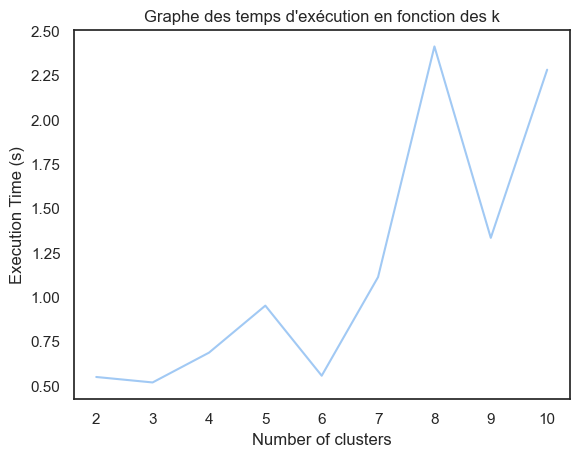

In [625]:
# graphe des temps d'exécution en fonction des k
plt.plot(result_df_2['k'], result_df_2['Execution Time (s)'])
plt.title('Graphe des temps d\'exécution en fonction des k')
plt.xlabel('Number of clusters')
plt.ylabel('Execution Time (s)')
plt.show()


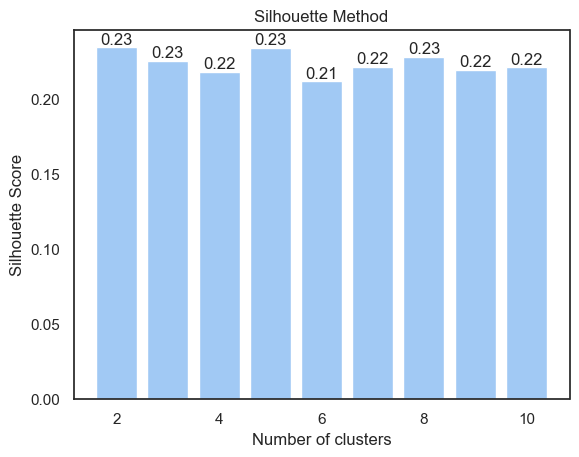

In [626]:
# bar chart of the silhouette scores for different k values
plt.bar(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

for i in range(2, 11):
    plt.text(i, silhouette_scores[i-2], f"{silhouette_scores[i-2]:.2f}", ha='center', va='bottom')
    
plt.show()

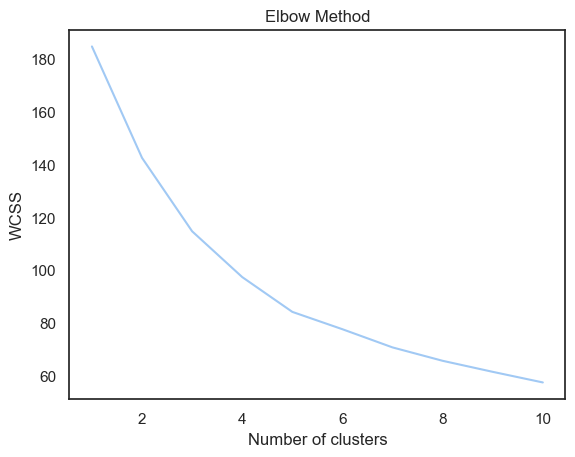

In [627]:
# elbow method
wcss = []

# Assuming X is your data
for i in range(1, 11):
    model = K_means(k=i, data=X2, distance='euclidean')  # Fix the k value here
    clusters, centroids = model.fit(100)
    wcss_value = np.sum((X2 - centroids[clusters]) ** 2)  # Calculate WCSS
    wcss.append(wcss_value)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

test avec k = 2

In [628]:

model = K_means(k=2, data=X2, distance='euclidean')
clusters, centroids = model.fit(100)
print(centroids)
print(clusters)

[[0.4886229  0.30917246 0.46315598 0.4678547 ]
 [0.74255049 0.6269732  0.57800512 0.34225823]]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 

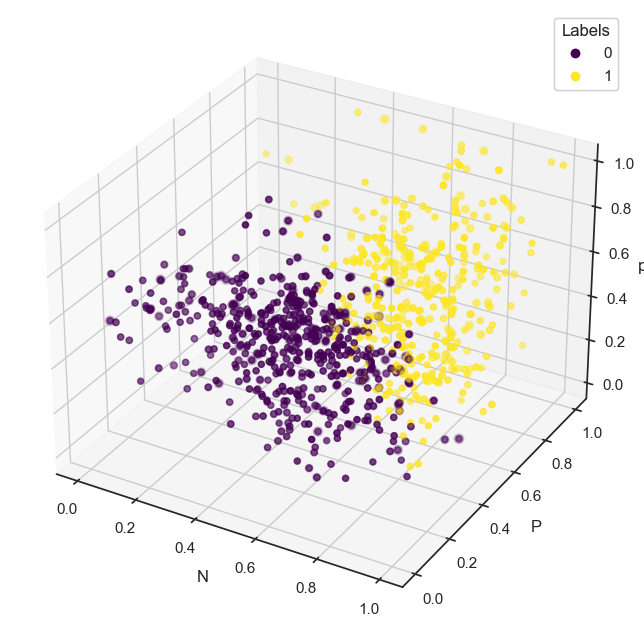

In [629]:
df1['Cluster']= clusters

# Créer une figure en 3D avec une taille spécifiée
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser seaborn pour tracer le scatterplot en 3D avec la couleur basée sur la 4ème colonne
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], c=df1.iloc[:, 4], cmap='viridis', marker='o')

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

# Ajouter une dimension supplémentaire pour la taille des marqueurs basée sur la 4ème colonne
size_factor = 50  # Ajustez cela en fonction de la taille souhaitée des marqueurs
scatter_sizes = df1.iloc[:, 3] * size_factor
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], s=scatter_sizes, c=df1.iloc[:, 4], cmap='viridis', marker='o', alpha=0.2)

# Ajouter le nom des attributs à chaque axe
ax.set_xlabel(df1.columns[0])
ax.set_ylabel(df1.columns[1])
ax.set_zlabel(df1.columns[2])

# Afficher le plot
plt.show()

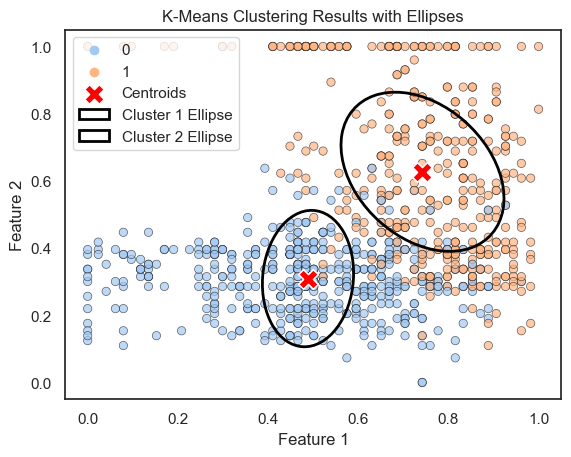

In [630]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Your code

# Use the "pastel" palette from Seaborn
sns.set_palette("pastel")

# Scatter plot for data points
scatter = sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=clusters, palette='pastel', edgecolor='k', alpha=0.7)

# Scatter plot for centroids in red
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=200, label='Centroids', ax=scatter)

# Ellipse plotting
for i in range(len(np.unique(clusters))):
    cluster_points = X[clusters == i]
    covariance_matrix = np.cov(cluster_points.T)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

    width = 2 * np.sqrt(eigenvalues[0])
    height = 2 * np.sqrt(eigenvalues[1])
    
    std_dev_x = np.sqrt(covariance_matrix[0, 0])
    std_dev_y = np.sqrt(covariance_matrix[1, 1])
    
    ellipse = Ellipse(xy=centroids[i], width=2 * std_dev_x, height=2 * std_dev_y, angle=angle, edgecolor='black', lw=2, fill=False, label=f'Cluster {i+1} Ellipse')
    plt.gca().add_patch(ellipse)

# Set plot title and axis labels
plt.title('K-Means Clustering Results with Ellipses')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Display the legend
plt.legend()

# Show the plot
plt.show()


c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\

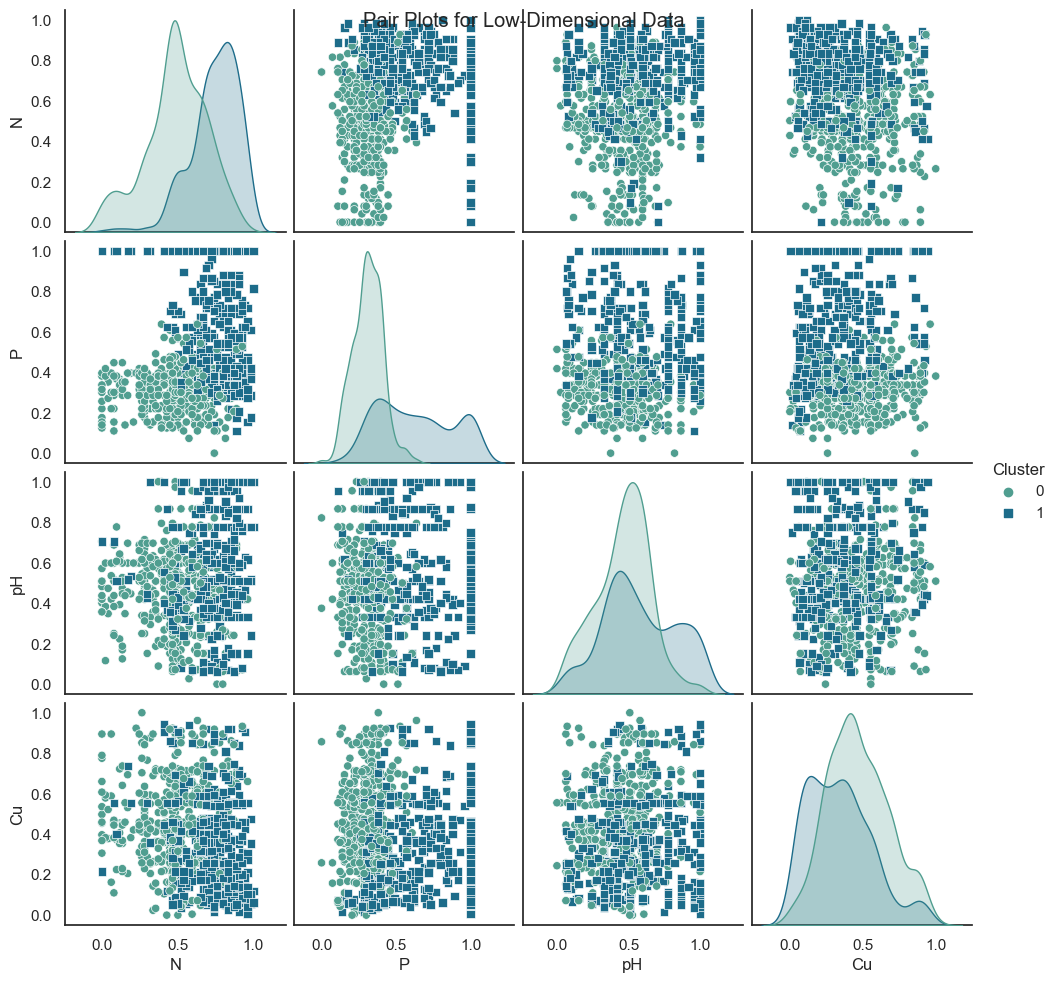

In [631]:
# Create pair plots
# drop the fertility column
df1 = df.copy()
df1.drop('Fertility', axis=1, inplace=True)
df1['Cluster']= clusters
sns.pairplot(df1, hue='Cluster', palette='crest', markers=['o', 's', 'D'])
plt.suptitle('Pair Plots for Low-Dimensional Data')
plt.show()

<h3>Evaluer avec le model de sklearn

c:\Users\HP.LAPTOP-ESRMF9MQ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


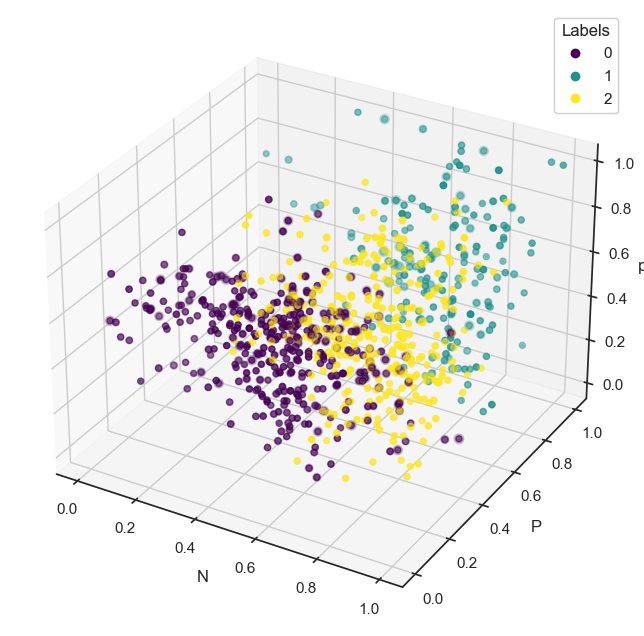

In [632]:
# test te sklean model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X2)
kmeans.labels_

kmeans.cluster_centers_

# Créer une figure en 3D avec une taille spécifiée
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser seaborn pour tracer le scatterplot en 3D avec la couleur basée sur la 4ème colonne
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], c=kmeans.labels_, cmap='viridis', marker='o')

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

# Ajouter une dimension supplémentaire pour la taille des marqueurs basée sur la 4ème colonne
size_factor = 50  # Ajustez cela en fonction de la taille souhaitée des marqueurs
scatter_sizes = df1.iloc[:, 3] * size_factor
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], s=scatter_sizes, c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.2)

# Ajouter le nom des attributs à chaque axe
ax.set_xlabel(df1.columns[0])
ax.set_ylabel(df1.columns[1])
ax.set_zlabel(df1.columns[2])

# Afficher le plot
plt.show()


In [633]:
# silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X2, kmeans.labels_)


0.2248879154913923

<h2>Application d’algorithme de clustering basé densité

<h2>DBscan

<h3> Expérimentation des paramètres de DBSCAN sur les instances du dataset

In [634]:

import time

epss = [ 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_pt = [4, 6, 8, 10, 12, 14, 16,  18, 20]
silhouette_avg = [[0 for i in range(len(min_pt))] for j in range(len(epss))]
result = []
X = df_final.iloc[:, :-1].values

for eps in epss:
    for pt in min_pt:
        start_time = time.time()  # Record the start time
        model = DBSCAN(eps=eps, min_samples=pt, distance='euclidean')
        labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X)
        end_time = time.time()  # Record the end time

        # store the result
        silhouette_avg[epss.index(eps)][min_pt.index(pt)] = silhouette_score_scratch(X, labels)
        silhouette_avg_print = silhouette_score_scratch(X, labels)

        print(f"Silhouette Score: {silhouette_avg_print} eps: {eps} min_pt: {pt}")
        print(f"Nombre de cluster : {len(clusters)}")
        print(f"Nombre de points dans le bruit : {len(noise)}")
        # Count the number of points in each cluster
        number_of_points_in_cluster = []
        unique_labels = np.unique(labels)

        for i in unique_labels:
            number_of_points_in_cluster.append((i, np.sum(labels == i)))
        print(f"Nombre de points dans un cluster : {number_of_points_in_cluster}")
        print(f"Clusters: {clusters}")
        print(f"Execution Time for eps={eps}, min_pt={pt}: {end_time - start_time} seconds")

        result.append({
            'eps': eps,
            'min point': pt,
            'Silhouette Score': silhouette_avg_print,
            'Num cluster': len(clusters),
            'Len cluster': number_of_points_in_cluster,  # Count unique cluster assignments
            'Noise': len(noise),
            'Execution Time (s)': end_time - start_time  # Calculate the execution time
        })

result_dbscan = pd.DataFrame(result)


Silhouette Score: 0.09735640961031439 eps: 0.3 min_pt: 4
Nombre de cluster : 7
Nombre de points dans le bruit : 68
Nombre de points dans un cluster : [(-1, 67), (1, 727), (2, 58), (3, 6), (4, 5), (5, 4), (6, 4), (7, 10)]
Clusters: [1, 2, 3, 4, 5, 6, 7]
Execution Time for eps=0.3, min_pt=4: 17.7053701877594 seconds
Silhouette Score: -0.004531844573006203 eps: 0.3 min_pt: 6
Nombre de cluster : 6
Nombre de points dans le bruit : 117
Nombre de points dans un cluster : [(-1, 116), (1, 659), (2, 49), (3, 6), (4, 10), (5, 36), (6, 5)]
Clusters: [1, 2, 3, 4, 5, 6]
Execution Time for eps=0.3, min_pt=6: 16.972919940948486 seconds
Silhouette Score: 0.07273026459725922 eps: 0.3 min_pt: 8
Nombre de cluster : 7
Nombre de points dans le bruit : 185
Nombre de points dans un cluster : [(-1, 178), (1, 625), (2, 14), (3, 14), (4, 13), (5, 10), (6, 20), (7, 7)]
Clusters: [1, 2, 3, 4, 5, 6, 7]
Execution Time for eps=0.3, min_pt=8: 16.795047521591187 seconds
Silhouette Score: -0.023155518781579083 eps: 0.3 

In [635]:
result_dbscan

eps  min point  Silhouette Score  Num cluster   
0   0.3          4          0.097356            7  \
1   0.3          6         -0.004532            6   
2   0.3          8          0.072730            7   
3   0.3         10         -0.023156            5   
4   0.3         12          0.326077            1   
5   0.3         14          0.315681            1   
6   0.3         16          0.295944            1   
7   0.3         18          0.281129            1   
8   0.3         20          0.013472            2   
9   0.4          4          0.204120            5   
10  0.4          6          0.338488            3   
11  0.4          8          0.222463            3   
12  0.4         10          0.199837            3   
13  0.4         12          0.321228            3   
14  0.4         14          0.086070            5   
15  0.4         16          0.262197            2   
16  0.4         18          0.369231            1   
17  0.4         20          0.355917            1   
18  0.5          4          0.210435            2   
19  0.5          6          0.349529            1   
20  0.5          8          0.332481            1   
21  0.5         10          0.183158            4   
22  0.5         12          0.415654            2   
23  0.5         14          0.405111            2   
24  0.5         16          0.358899            3   
25  0.5         18          0.348247            3   
26  0.5         20          0.274990            4   
27  0.6          4          0.370449            1   
28  0.6          6          0.346145            1   
29  0.6          8          0.370901            1   
30  0.6         10          0.344294            1   
31  0.6         12          0.337279            1   
32  0.6         14          0.429919            2   
33  0.6         16          0.428983            2   
34  0.6         18          0.426012            2   
35  0.6         20          0.421352            2   
36  0.7          4          0.396474            1   
37  0.7          6          0.389702            1   
38  0.7          8          0.389702            1   
39  0.7         10          0.373345            1   
40  0.7         12          0.364126            1   
41  0.7         14          0.364455            1   
42  0.7         16          0.350957            1   
43  0.7         18          0.438278            2   
44  0.7         20          0.450864            2   
45  0.8          4          0.396474            1   
46  0.8          6          0.413196            1   
47  0.8          8          0.413196            1   
48  0.8         10          0.413196            1   
49  0.8         12          0.413196            1   
50  0.8         14          0.392880            1   
51  0.8         16          0.407428            1   
52  0.8         18          0.375206            1   
53  0.8         20          0.372385            1   

                                          Len cluster  Noise   
0   [(-1, 67), (1, 727), (2, 58), (3, 6), (4, 5), ...     68  \
1   [(-1, 116), (1, 659), (2, 49), (3, 6), (4, 10)...    117   
2   [(-1, 178), (1, 625), (2, 14), (3, 14), (4, 13...    185   
3   [(-1, 229), (1, 602), (2, 10), (3, 12), (4, 10...    234   
4                               [(-1, 303), (1, 578)]    303   
5                               [(-1, 314), (1, 567)]    314   
6                               [(-1, 328), (1, 553)]    328   
7                               [(-1, 339), (1, 542)]    340   
8                      [(-1, 351), (1, 510), (2, 20)]    352   
9   [(-1, 21), (1, 779), (2, 68), (3, 4), (4, 4), ...     26   
10              [(-1, 49), (1, 756), (2, 68), (3, 8)]     49   
11              [(-1, 71), (1, 738), (2, 67), (3, 5)]     72   
12              [(-1, 86), (1, 723), (2, 64), (3, 8)]     86   
13            [(-1, 118), (1, 678), (2, 59), (3, 26)]    119   
14  [(-1, 154), (1, 653), (2, 17), (3, 27), (4, 21...    165   
15                     [(-1, 218), (1, 646), (2, 17)]    219   


In [636]:
result_dbscan.to_csv('../Data/result_dbscan_pca.csv', index=False)

In [637]:
model = DBSCAN(eps=0.7, min_samples=19, distance='euclidean')
labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X)
print(labels)
print(clusters)
print(noise)
print(len(noise))
print(f'the core samples are {core_samples}')

# Count the number of points in each cluster
number_of_points_in_cluster = []
unique_labels = np.unique(labels)

for i in unique_labels:
    number_of_points_in_cluster.append((i, np.sum(labels == i)))

print(f"Nombre de points dans un cluster : {number_of_points_in_cluster}")
print(f'neighborhoods are {neighborhoods}')


[1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, -1, 2, -1, -1, 1, 1, 2, 2, 2, 2, -1, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

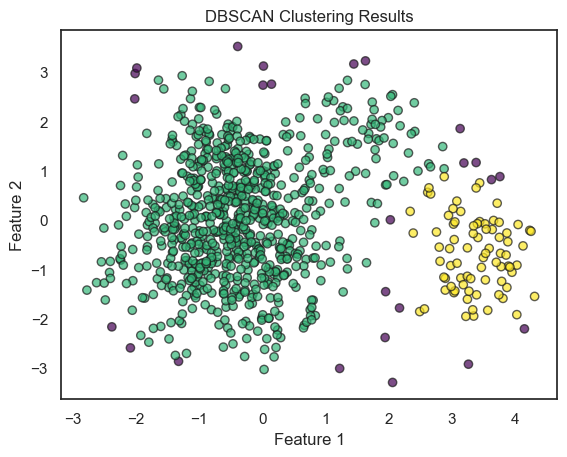

In [638]:
#plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [639]:
print("Label Distribution:", np.unique(labels, return_counts=True))

Label Distribution: (array([-1,  1,  2]), array([ 25, 778,  78], dtype=int64))


In [640]:
silhouette_dbscan = silhouette_score_scratch(X, labels)
print(f"Silhouette Score: {silhouette_dbscan}")

Silhouette Score: 0.45096655323207396


<h3>Pair plots

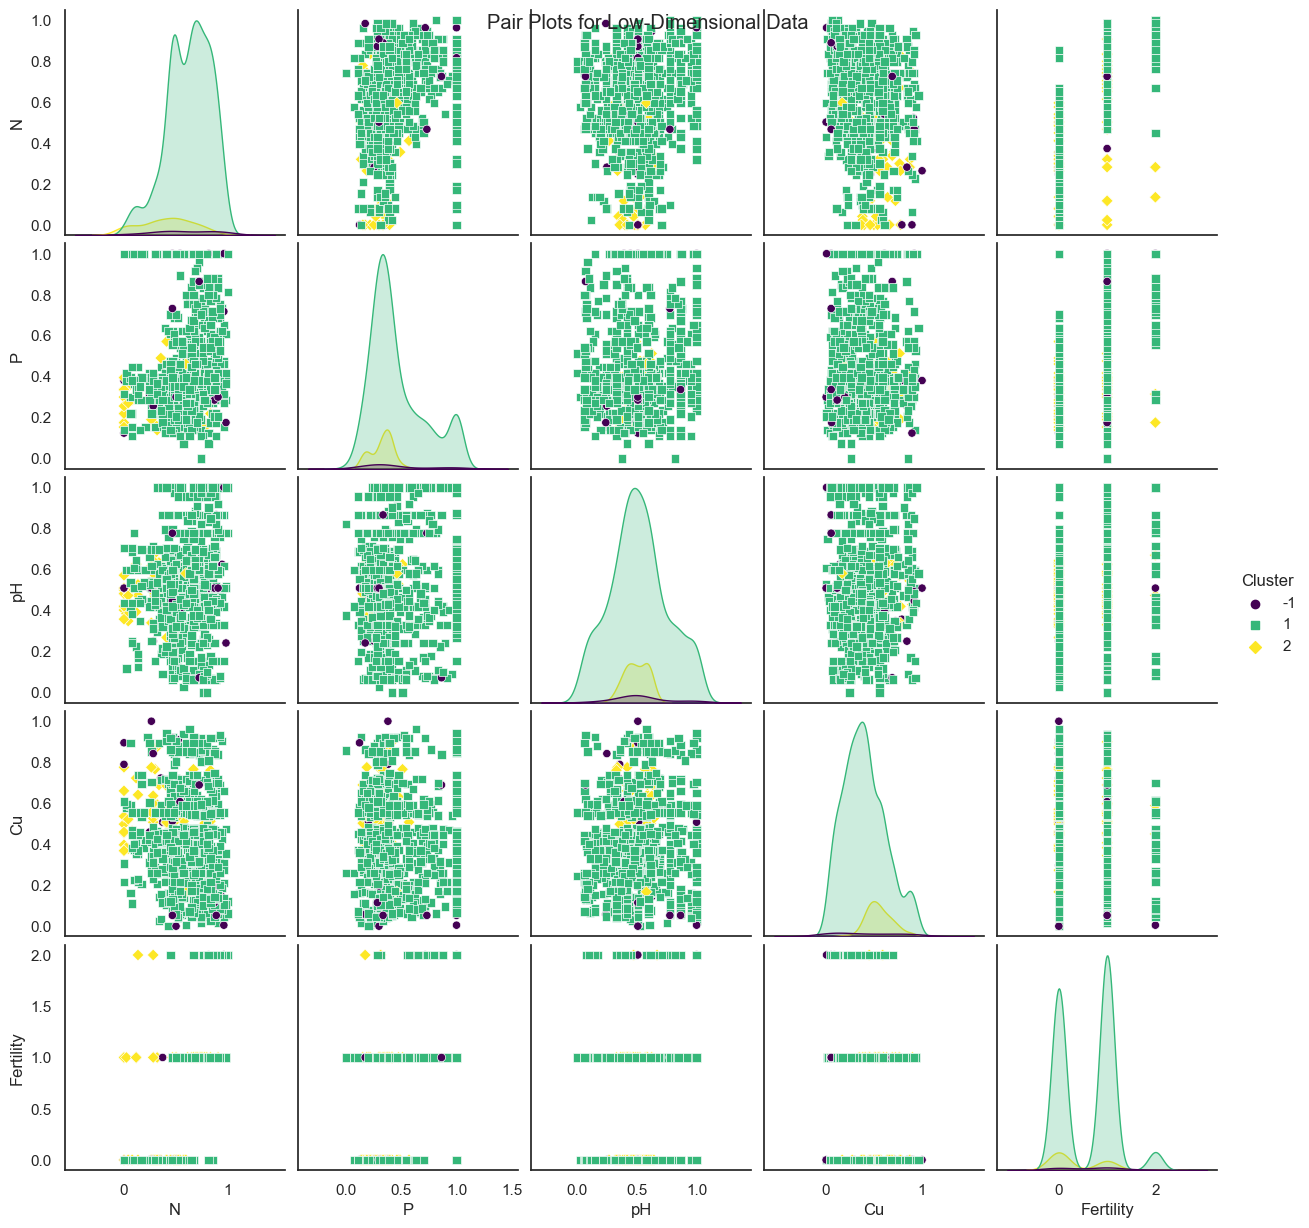

In [641]:
# Create pair plots
df['Cluster']= labels
sns.pairplot(df, hue='Cluster', palette='viridis', markers=['o', 's', 'D'])
plt.suptitle('Pair Plots for Low-Dimensional Data')
plt.show()

<h3>Parallel Coordinates plot

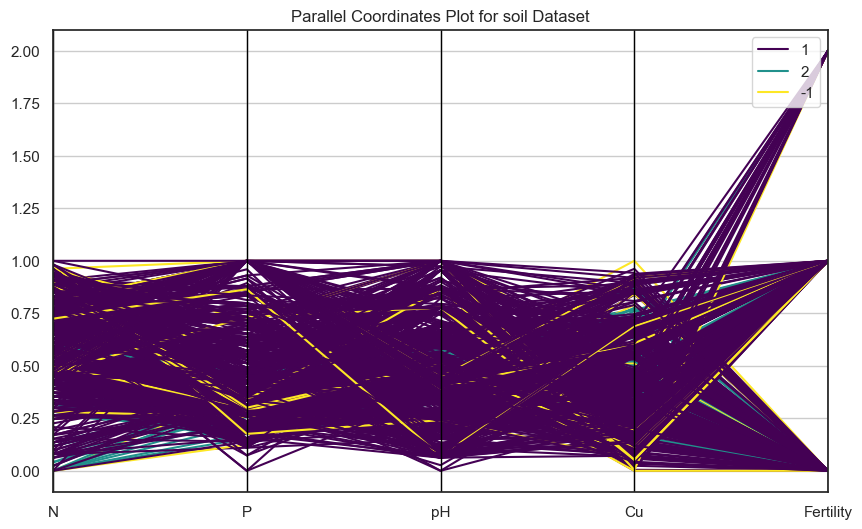

In [642]:
# Plotting Parallel Coordinates
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot for soil Dataset')
plt.show()

<h3> plot Experimentation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


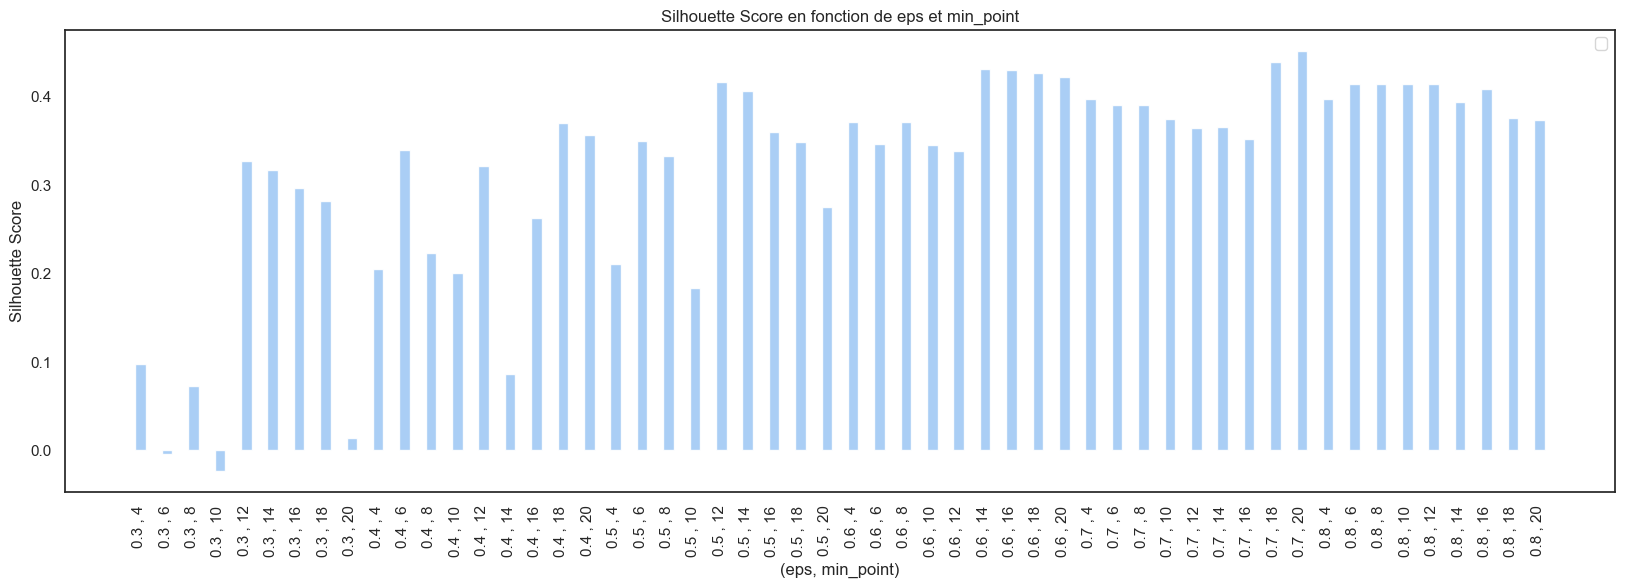

In [643]:
# Créer un graphique à barres groupées
fig, ax = plt.subplots(figsize=(20, 6))

# Définir la largeur des barres
bar_width = 0.4

# Décaler les positions des barres pour chaque groupe
bar_positions_eps = [i for i in range(len(result_dbscan['eps']))]
bar_positions_min_point = [i + bar_width for i in bar_positions_eps]

# Tracer les barres pour eps
ax.bar(bar_positions_eps, result_dbscan['Silhouette Score'], width=bar_width,  alpha=0.9)

# Définir les étiquettes des axes et la légende
labels = [f"{eps} , {min_point}" for eps, min_point in zip(result_dbscan['eps'], result_dbscan['min point'])]
ax.set_xticks([i + bar_width / 2 for i in bar_positions_eps])
ax.set_xticklabels(labels, rotation=90, ha='right')
ax.set_xlabel('(eps, min_point)')
ax.set_ylabel('Silhouette Score')
ax.legend()

# Ajouter un titre
plt.title('Silhouette Score en fonction de eps et min_point')

# Afficher le graphique
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


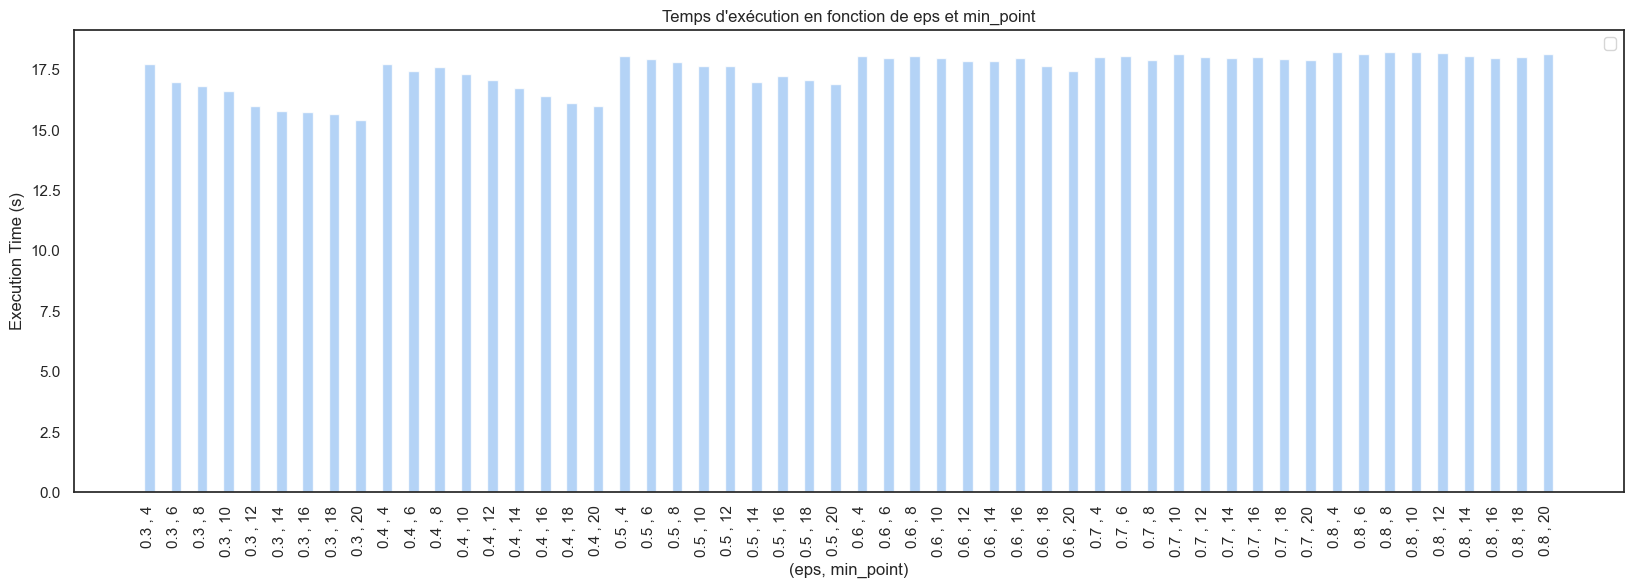

In [644]:
# Créer un graphique à barres groupées
fig, ax = plt.subplots(figsize=(20, 6))

# Définir la largeur des barres
bar_width = 0.4

# Décaler les positions des barres pour chaque groupe
bar_positions_eps = [i for i in range(len(result_dbscan['eps']))]
bar_positions_min_point = [i + bar_width for i in bar_positions_eps]

# Tracer les barres pour eps
ax.bar(bar_positions_eps, result_dbscan['Execution Time (s)'], width=bar_width,  alpha=0.8)

# Définir les étiquettes des axes et la légende
labels = [f"{eps} , {min_point}" for eps, min_point in zip(result_dbscan['eps'], result_dbscan['min point'])]
ax.set_xticks([i + bar_width / 2 for i in bar_positions_eps])
ax.set_xticklabels(labels, rotation=90, ha='right')
ax.set_xlabel('(eps, min_point)')
ax.set_ylabel('Execution Time (s)')
ax.legend()

# Ajouter un titre
plt.title('Temps d\'exécution en fonction de eps et min_point')

# Afficher le graphique
plt.show()

<h3>Evalution avec la colonne fertility de notre dataset

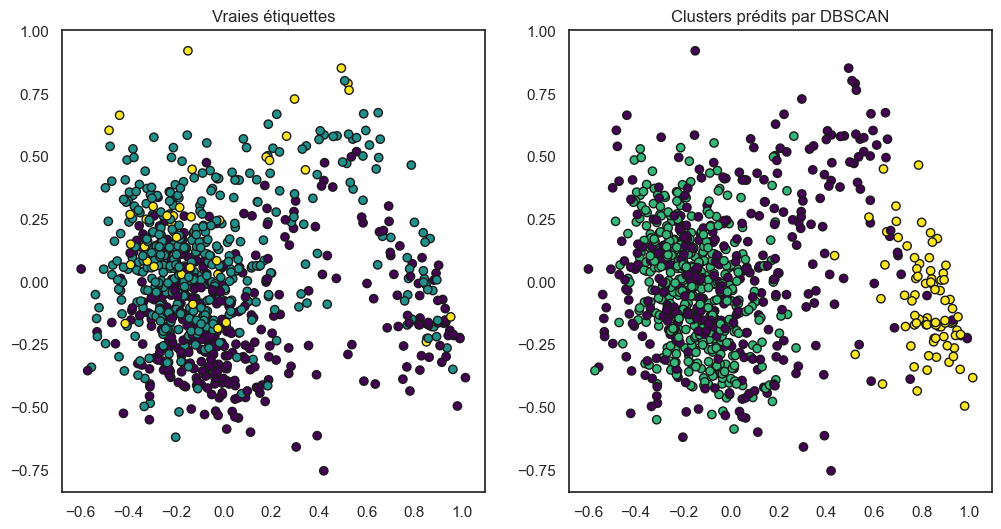

In [645]:
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA


X = data.iloc[:, :-1].values
y_true = data['Fertility'].values

# Appliquer DBSCAN
model = DBSCAN(eps=0.5, min_samples=20, distance='euclidean')
y_pred, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X)


# Réduction de dimension avec PCA pour la visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualiser les clusters prédits par DBSCAN
plt.figure(figsize=(12, 6))

# Visualisation des vraies étiquettes
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', edgecolor='k')
plt.title('Vraies étiquettes')

# Visualisation des clusters prédits par DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k')
plt.title('Clusters prédits par DBSCAN')

plt.show()



<h3> la métrique adjusted_rand_score

L'ARS varie de -1 à 1. Une valeur de 1 indique une parfaite concordance entre les deux partitions, 0 indique une concordance aléatoire, et -1 indique une discordance totale.

In [646]:
# Comparaison avec la métrique adjusted_rand_score
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.03358930563847116


<h2>Feature selection

In [647]:
import time

epss = [ 0.1, 0.2, 0.3]
min_pt = [4, 6, 8, 10, 12, 14, 16,  18, 20]
silhouette_avg = [[0 for i in range(len(min_pt))] for j in range(len(epss))]
result = []

for eps in epss:
    for pt in min_pt:
        start_time = time.time()  # Record the start time
        model = DBSCAN(eps=eps, min_samples=pt, distance='euclidean')
        labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X2)
        end_time = time.time()  # Record the end time

        # store the result
        silhouette_avg[epss.index(eps)][min_pt.index(pt)] = silhouette_score_scratch(X2, labels)
        silhouette_avg_print = silhouette_score_scratch(X2, labels)

        print(f"Silhouette Score: {silhouette_avg_print} eps: {eps} min_pt: {pt}")
        print(f"Nombre de cluster : {len(clusters)}")
        print(f"Nombre de points dans le bruit : {len(noise)}")
        # Count the number of points in each cluster
        number_of_points_in_cluster = []
        unique_labels = np.unique(labels)

        for i in unique_labels:
            number_of_points_in_cluster.append((i, np.sum(labels == i)))
        print(f"Nombre de points dans un cluster : {number_of_points_in_cluster}")
        print(f"Clusters: {clusters}")
        print(f"Execution Time for eps={eps}, min_pt={pt}: {end_time - start_time} seconds")

        result.append({
            'eps': eps,
            'min point': pt,
            'Silhouette Score': silhouette_avg_print,
            'Num cluster': len(clusters),
            'Len cluster': number_of_points_in_cluster,  # Count unique cluster assignments
            'Noise': len(noise),
            'Execution Time (s)': end_time - start_time  # Calculate the execution time
        })

result_dbscan = pd.DataFrame(result)


Silhouette Score: -0.29380559366408987 eps: 0.1 min_pt: 4
Nombre de cluster : 23
Nombre de points dans le bruit : 505
Nombre de points dans un cluster : [(-1, 485), (1, 254), (2, 11), (3, 12), (4, 5), (5, 10), (6, 21), (7, 4), (8, 3), (9, 5), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (15, 5), (16, 11), (17, 6), (18, 5), (19, 6), (20, 5), (21, 4), (22, 4), (23, 5)]
Clusters: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Execution Time for eps=0.1, min_pt=4: 14.656829118728638 seconds
Silhouette Score: -0.294362110479483 eps: 0.1 min_pt: 6
Nombre de cluster : 9
Nombre de points dans le bruit : 666
Nombre de points dans un cluster : [(-1, 655), (1, 142), (2, 9), (3, 6), (4, 13), (5, 15), (6, 21), (7, 2), (8, 12), (9, 6)]
Clusters: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Execution Time for eps=0.1, min_pt=6: 13.667465925216675 seconds
Silhouette Score: -0.3090089689029916 eps: 0.1 min_pt: 8
Nombre de cluster : 6
Nombre de points dans le bruit : 761
Nombre de po

In [648]:
X2

array([[0.28152493, 0.41758242, 0.47321429, 0.32535885],
       [0.50146628, 0.33699634, 0.61607143, 0.6937799 ],
       [0.35483871, 0.49084249, 0.58928571, 0.70813397],
       ...,
       [0.68621701, 0.46153846, 0.61607143, 0.25837321],
       [0.81524927, 0.7985348 , 0.40178571, 0.44497608],
       [0.65102639, 0.54212454, 0.5       , 0.85167464]])

In [649]:
model = DBSCAN(eps=0.2, min_samples=18, distance='euclidean')
labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X2)
print(labels)
print(clusters)
print(noise)
print(len(noise))
print(f'the core samples are {core_samples}')

# Count the number of points in each cluster
number_of_points_in_cluster = []
unique_labels = np.unique(labels)

for i in unique_labels:
    number_of_points_in_cluster.append((i, np.sum(labels == i)))

print(f"Nombre de points dans un cluster : {number_of_points_in_cluster}")
print(f'neighborhoods are {neighborhoods}')


[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -

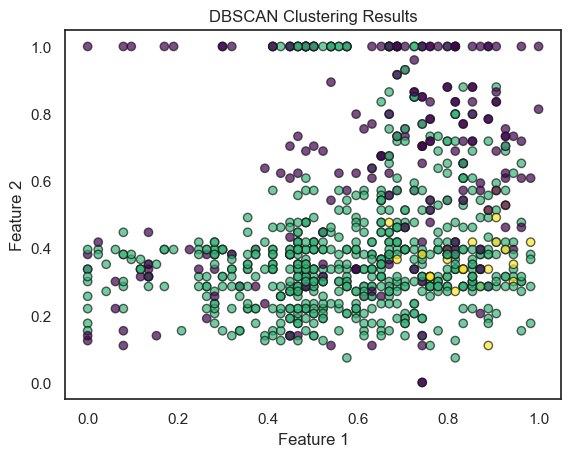

In [650]:
#plotting the clusters
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [651]:
print("Label Distribution:", np.unique(labels, return_counts=True))

Label Distribution: (array([-1,  1,  2]), array([201, 656,  24], dtype=int64))


In [652]:
silhouette_dbscan = silhouette_score_scratch(X2, labels)
print(f"Silhouette Score: {silhouette_dbscan}")

Silhouette Score: 0.12248175456717122


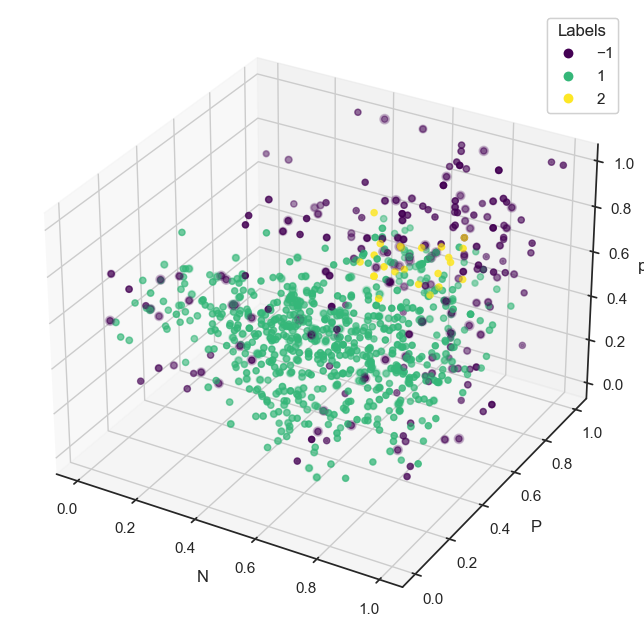

In [653]:
df1['Cluster']= labels

# Créer une figure en 3D avec une taille spécifiée
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser seaborn pour tracer le scatterplot en 3D avec la couleur basée sur la 4ème colonne
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], c=df1.iloc[:, 4], cmap='viridis', marker='o')

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

# Ajouter une dimension supplémentaire pour la taille des marqueurs basée sur la 4ème colonne
size_factor = 50  # Ajustez cela en fonction de la taille souhaitée des marqueurs
scatter_sizes = df1.iloc[:, 3] * size_factor
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], s=scatter_sizes, c=df1.iloc[:, 4], cmap='viridis', marker='o', alpha=0.2)

# Ajouter le nom des attributs à chaque axe
ax.set_xlabel(df1.columns[0])
ax.set_ylabel(df1.columns[1])
ax.set_zlabel(df1.columns[2])

# Afficher le plot
plt.show()

<h3>Evaluer avec le model de sklearn

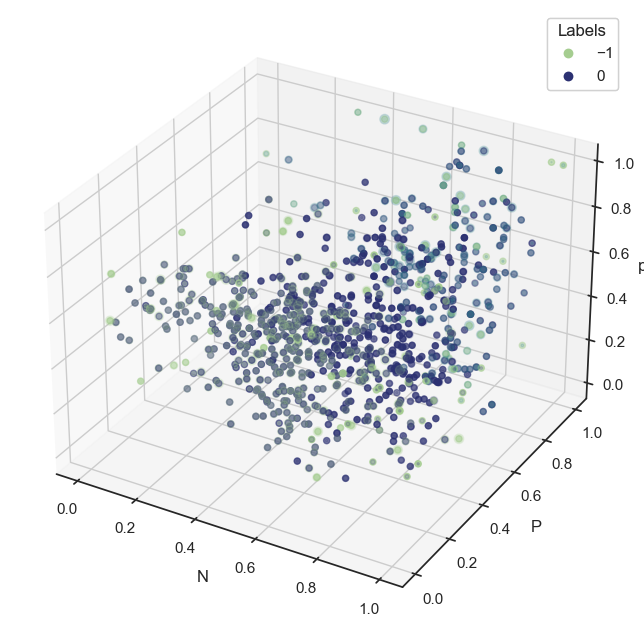

In [654]:
# import dbscan
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)


# Créer une figure en 3D avec une taille spécifiée
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser seaborn pour tracer le scatterplot en 3D avec la couleur basée sur la 4ème colonne
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], c=y_pred, cmap='crest', marker='o')

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

# Ajouter une dimension supplémentaire pour la taille des marqueurs basée sur la 4ème colonne
size_factor = 50  # Ajustez cela en fonction de la taille souhaitée des marqueurs
scatter_sizes = df1.iloc[:, 3] * size_factor
scatter = ax.scatter(xs=df1.iloc[:, 0], ys=df1.iloc[:, 1], zs=df1.iloc[:, 2], s=scatter_sizes, c=kmeans.labels_, cmap='crest', marker='o', alpha=0.2)

# Ajouter le nom des attributs à chaque axe
ax.set_xlabel(df1.columns[0])
ax.set_ylabel(df1.columns[1])
ax.set_zlabel(df1.columns[2])

# Afficher le plot
plt.show()


In [655]:
silhouette_ = silhouette_score_scratch(X, y_pred)
silhouette_

0.09551311629325458

In [656]:
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.004737849212668496


<h1> Comparaison entre K-means et dbscan

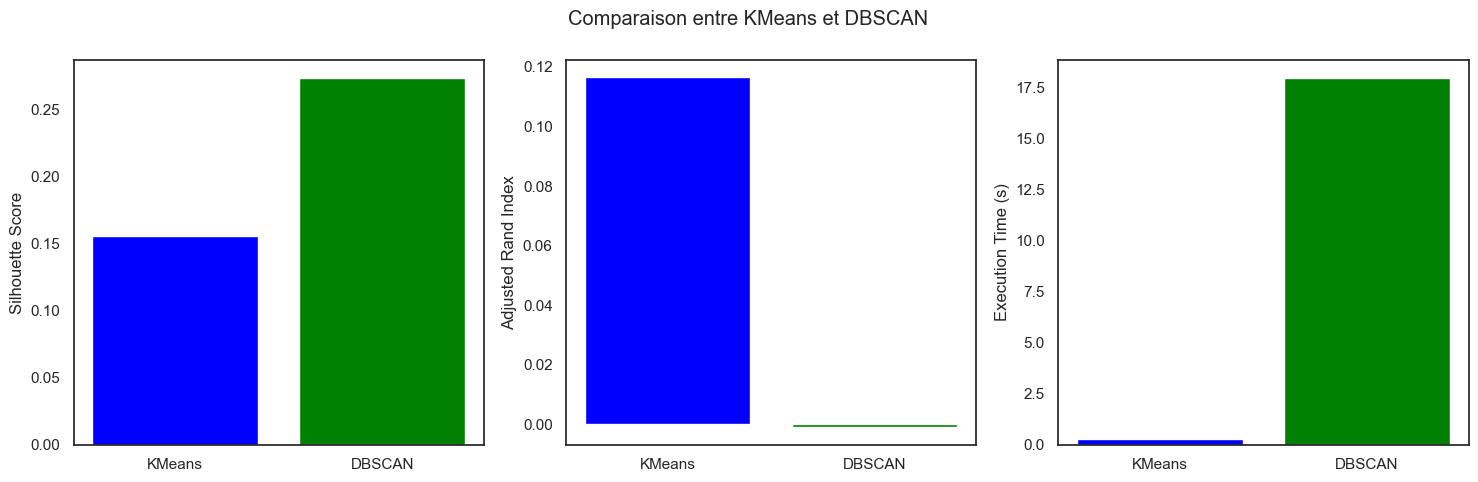

In [657]:
from dbscan import DBSCAN
start_time = time.time()
model = DBSCAN(eps=0.7, min_samples=19, distance='euclidean')
labels, clusters, noise, core_samples, neighbors, neighborhood, neighborhoods, distance_matrix = model.fit(X)
dbscan_execution_time = time.time() - start_time

start_time = time.time()
model = K_means(k=3, data=X, distance='euclidean')
clusters, centroids = model.fit(100)
kmeans_execution_time = time.time() - start_time
# Métriquess)
kmeans_silhouette = silhouette_score_scratch(X, clusters)
dbscan_silhouette = silhouette_score_scratch(X, labels)

kmeans_ari = adjusted_rand_score(y_true, clusters)  # Remplacez true_labels par vos vraies étiquettes
dbscan_ari = adjusted_rand_score(y_true, labels)  # Remplacez true_labels par vos vraies étiquettes

# Créer un graphique à barres avec sous-graphiques
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
ax[0].bar(['KMeans', 'DBSCAN'], [kmeans_silhouette, dbscan_silhouette], color=['blue', 'green'])
ax[0].set_ylabel('Silhouette Score')

# ARI
ax[1].bar(['KMeans', 'DBSCAN'], [kmeans_ari, dbscan_ari], color=['blue', 'green'])
ax[1].set_ylabel('Adjusted Rand Index')

# Temps d'exécution
ax[2].bar(['KMeans', 'DBSCAN'], [kmeans_execution_time, dbscan_execution_time], color=['blue', 'green'])
ax[2].set_ylabel('Execution Time (s)')

# Ajouter un titre
plt.suptitle('Comparaison entre KMeans et DBSCAN')

plt.show()

In [658]:
# print les metrique 
print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"KMeans Adjusted Rand Index: {kmeans_ari}")
print(f"DBSCAN Adjusted Rand Index: {dbscan_ari}")
print(f"KMeans Execution Time: {kmeans_execution_time}")
print(f"DBSCAN Execution Time: {dbscan_execution_time}")


KMeans Silhouette Score: 0.15513588500504355
DBSCAN Silhouette Score: 0.27288519174925835
KMeans Adjusted Rand Index: 0.11644525858229814
DBSCAN Adjusted Rand Index: -0.001000282643635475
KMeans Execution Time: 0.28691625595092773
DBSCAN Execution Time: 17.929441928863525


<h1>Done!!